In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns

from matplotlib import rcParams

sns.set_context("talk")
sns.set_palette(sns.color_palette("husl", 8)[5:])

sns.set_style("white", {"font.family": ['Courier New']})


In [11]:

import os
import sys
from sqlalchemy import Column, ForeignKey, Integer, String
from sqlalchemy.ext.declarative import declarative_base, as_declarative
from sqlalchemy.orm import relationship, sessionmaker
from sqlalchemy import create_engine

@as_declarative()
class Base(object):
    def __repr__(self):
        return "<%s: %s>" % (self.__class__.__name__, self.__dict__)


# SQL definition that matches our table

class Articles(Base):
    __tablename__ = 'retractions' # rename this

    id = Column(Integer, primary_key=True)
    body = Column(String, nullable=False)
    title = Column(String, nullable=False)
    url = Column(String, nullable=False)
    event_id = Column(String, nullable=False)
    month = Column(String, nullable=False)
    year  = Column(String, nullable=False)
    correction_type = Column(Integer, nullable=True)
    correction_check = Column(Integer, nullable=True)
    correction_info = Column(String, nullable=True)


# Create a SQLAlchemy session

engine = create_engine('mysql://root@localhost/retractions')
Session = sessionmaker()
Session.configure(bind=engine)
sess = Session()


/Users/nbuxton/anaconda3/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1569: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


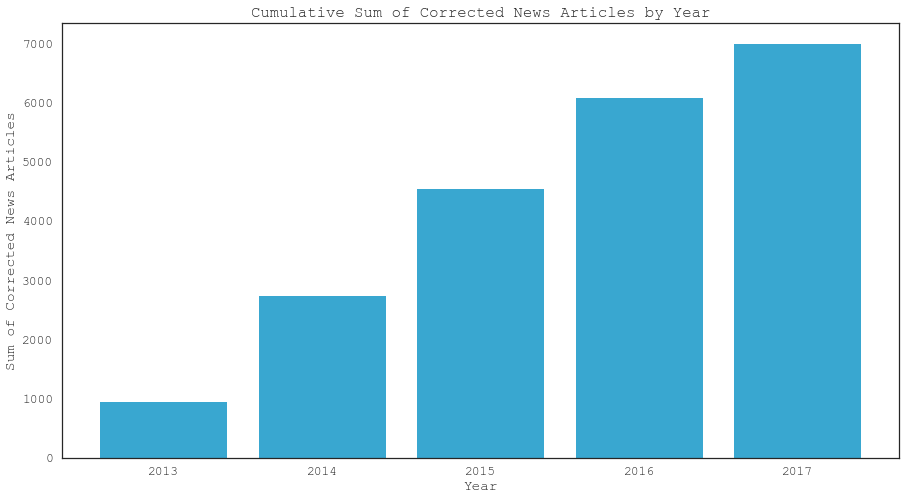

In [12]:
# cumulative
years = []
counts = []
acc = 0
result = sess.execute('SELECT COUNT(*) as count, year FROM retractions WHERE correction_type!=0 GROUP BY year ORDER BY year ASC')
for r in result:
    acc = acc+r[0]
    counts.append(acc)
    years.append(r[1])


ax = plt.subplots(figsize=(15, 8))

plt.bar(years, counts)
plt.xlabel("Year")
plt.ylabel("Sum of Corrected News Articles")
plt.title("Cumulative Sum of Corrected News Articles by Year")
plt.show()